In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ngukurr au
yellowknife ca
sumbawa id
severomuysk ru
puerto colombia co
mpraeso gh
hilo us
mataura pf
chokurdakh ru
barra do garcas br
mendoza ar
upernavik gl
nsanje mw
rikitea pf
norman wells ca
nanortalik gl
yellowknife ca
pisco pe
rikitea pf
bargal so
maarianhamina fi
chuy uy
mataura pf
bredasdorp za
jamestown sh
amderma ru
kodiak us
qaanaaq gl
haibowan cn
katsuura jp
hobart au
khatanga ru
skjervoy no
cape town za
huarmey pe
kavieng pg
ushuaia ar
college us
tasiilaq gl
funtua ng
jaciara br
rikitea pf
port alfred za
vaitupu wf
yellowknife ca
amderma ru
okato nz
nanortalik gl
russell nz
qaqortoq gl
port alfred za
lakes entrance au
makat kz
vaini to
castro cl
naryan-mar ru
alekseyevsk ru
rikitea pf
taolanaro mg
saint-philippe re
guerrero negro mx
punta arenas cl
mys shmidta ru
rikitea pf
atuona pf
namatanai pg
port alfred za
jamestown sh
nuuk gl
tsihombe mg
carman ca
lata sb
hobart au
alugan ph
puerto colombia co
djang cm
saleaula ws
grand river south east mu
port alfred za
hilo us
tura

wanaka nz
faanui pf
grand island us
nyimba zm
lebu cl
rognan no
kodiak us
cape town za
port-gentil ga
taolanaro mg
homer us
lardos gr
carnarvon au
kamenskoye ru
rikitea pf
urusha ru
taolanaro mg
ribeira grande pt
aklavik ca
nha trang vn
porto belo br
albany au
new norfolk au
ribeira grande pt
sinnamary gf
mataura pf
torrington us
pizarro co
jamestown sh
avarua ck
bluff nz
upington za
punta arenas cl
westport nz
clyde river ca
muisne ec
tiksi ru
yellowknife ca
east london za
grand river south east mu
marcona pe
lavrentiya ru
labuhan id
taolanaro mg
arraial do cabo br
waddan ly
lingao cn
inuvik ca
cape town za
neyshabur ir
ilave pe
albany au
rikitea pf
maceio br
nanakuli us
phan rang vn
yellowknife ca
narsaq gl
shelburne ca
hobart au
kruisfontein za
san quintin mx
longyearbyen sj
nizhneyansk ru
norman wells ca
nanyang cn
ushuaia ar
ushuaia ar
gomel by
umea se
zhangye cn
kodiak us
khonuu ru
portland au
mahebourg mu
punta arenas cl
alofi nu
belaya gora ru
socorro us
new norfolk au
delijan 

east london za
ushuaia ar
lompoc us
jamestown sh
georgetown sh
ciudad bolivar ve
griffith au
mataura pf
iracoubo gf
nikolskoye ru
ushuaia ar
mar del plata ar
indramayu id
homer us
albany au
abu kamal sy
atuona pf
trapani it
morehead pg
port elizabeth za
tiksi ru
tignere cm
vaini to
rikitea pf
burnie au
carnarvon au
vila velha br
taoudenni ml
sentyabrskiy ru
puerto ayora ec
torbay ca
guangyuan cn
busselton au
attawapiskat ca
marrakesh ma
miranorte br
busselton au
khandyga ru
pitiquito mx
rikitea pf
tsihombe mg
walvis bay na
cape town za
chicama pe
kapaa us
rikitea pf
nizhneyansk ru
ushuaia ar
mgandu tz
businga cd
puerto ayora ec
gizo sb
portland au
aklavik ca
mys shmidta ru
pangnirtung ca
nikolskoye ru
lososina ru
kavieng pg
lasa cn
hermanus za
kavieng pg
hensall ca
port elizabeth za
rio gallegos ar
arraial do cabo br
monrovia lr
deputatskiy ru
wagar sd
northam au
faanui pf
laurel us
punta arenas cl
mahebourg mu
mataura pf
port alfred za
kloulklubed pw
taolanaro mg
hermanus za
olinda br

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 3 | ngukurr
City not found. Skipping...
Processing Record 2 of Set 3 | yellowknife
Processing Record 3 of Set 3 | sumbawa
City not found. Skipping...
Processing Record 4 of Set 3 | severomuysk
Processing Record 5 of Set 3 | puerto colombia
Processing Record 6 of Set 3 | mpraeso
Processing Record 7 of Set 3 | hilo
Processing Record 8 of Set 3 | mataura
Processing Record 9 of Set 3 | chokurdakh
Processing Record 10 of Set 3 | barra do garcas
Processing Record 11 of Set 3 | mendoza
Processing Record 12 of Set 3 | upernavik
Processing Record 13 of Set 3 | nsanje
Processing Record 14 of Set 3 | rikitea
Processing Record 15 of Set 3 | norman wells
Processing Record 16 of Set 3 | nanortalik
Processing Record 17 of Set 3 | pisco
Processing Record 18 of Set 3 | bargal
City not found. Skipping...
Processing Record 19 of Set 3 | maarianhamina
Processing Record 20 of Set 3 | chuy
Processing Record 21 of Set 3 | bredasdorp
Processing Record 22 of Set 3 | jamestown
Process

Processing Record 39 of Set 6 | aklavik
Processing Record 40 of Set 6 | terney
Processing Record 41 of Set 6 | nemuro
Processing Record 42 of Set 6 | bambous virieux
Processing Record 43 of Set 6 | manjacaze
Processing Record 44 of Set 6 | sao felix do xingu
Processing Record 45 of Set 6 | bonavista
Processing Record 46 of Set 6 | ust-omchug
Processing Record 47 of Set 6 | nouadhibou
Processing Record 48 of Set 6 | san juan
Processing Record 49 of Set 6 | fortuna
Processing Record 50 of Set 6 | saskylakh
Processing Record 1 of Set 7 | bluff
Processing Record 2 of Set 7 | cayenne
Processing Record 3 of Set 7 | khuzdar
Processing Record 4 of Set 7 | vestmannaeyjar
Processing Record 5 of Set 7 | rincon
Processing Record 6 of Set 7 | srivardhan
Processing Record 7 of Set 7 | dwarka
Processing Record 8 of Set 7 | vardo
Processing Record 9 of Set 7 | kondinskoye
Processing Record 10 of Set 7 | ankang
Processing Record 11 of Set 7 | noyabrsk
Processing Record 12 of Set 7 | kurchum
Processing 

Processing Record 27 of Set 10 | kamenskoye
City not found. Skipping...
Processing Record 28 of Set 10 | nha trang
Processing Record 29 of Set 10 | porto belo
Processing Record 30 of Set 10 | sinnamary
Processing Record 31 of Set 10 | torrington
Processing Record 32 of Set 10 | pizarro
Processing Record 33 of Set 10 | upington
Processing Record 34 of Set 10 | westport
Processing Record 35 of Set 10 | muisne
Processing Record 36 of Set 10 | tiksi
Processing Record 37 of Set 10 | marcona
City not found. Skipping...
Processing Record 38 of Set 10 | labuhan
Processing Record 39 of Set 10 | waddan
Processing Record 40 of Set 10 | lingao
Processing Record 41 of Set 10 | inuvik
Processing Record 42 of Set 10 | neyshabur
Processing Record 43 of Set 10 | ilave
Processing Record 44 of Set 10 | maceio
Processing Record 45 of Set 10 | nanakuli
Processing Record 46 of Set 10 | phan rang
City not found. Skipping...
Processing Record 47 of Set 10 | shelburne
Processing Record 48 of Set 10 | san quint

Processing Record 17 of Set 14 | darhan
Processing Record 18 of Set 14 | vao
Processing Record 19 of Set 14 | samarai
Processing Record 20 of Set 14 | praya
Processing Record 21 of Set 14 | shimoda
Processing Record 22 of Set 14 | tunceli
Processing Record 23 of Set 14 | mount pleasant
Processing Record 24 of Set 14 | araouane
Processing Record 25 of Set 14 | amasya
Processing Record 26 of Set 14 | chaochou
City not found. Skipping...
Processing Record 27 of Set 14 | ailigandi
Processing Record 28 of Set 14 | hauterive
Processing Record 29 of Set 14 | challakere
Processing Record 30 of Set 14 | naze
Processing Record 31 of Set 14 | cockburn town
Processing Record 32 of Set 14 | angoram
Processing Record 33 of Set 14 | oussouye
Processing Record 34 of Set 14 | erzin
Processing Record 35 of Set 14 | ivanino
Processing Record 36 of Set 14 | magan
Processing Record 37 of Set 14 | pilar do sul
Processing Record 38 of Set 14 | cascais
Processing Record 39 of Set 14 | chatellerault
Processing

In [17]:
len(city_data)

574

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,31.41,74,100,10.36,CA,2022-04-05 23:51:12
1,Severomuysk,56.1481,113.4267,4.59,79,100,2.24,RU,2022-04-05 23:51:12
2,Puerto Colombia,10.9878,-74.9547,82.49,85,99,18.77,CO,2022-04-05 23:51:13
3,Mpraeso,6.5932,-0.7346,74.19,91,94,3.38,GH,2022-04-05 23:51:13
4,Hilo,19.7297,-155.0900,76.73,78,100,8.05,US,2022-04-05 23:51:13
5,Mataura,-46.1927,168.8643,49.60,81,66,12.86,NZ,2022-04-05 23:51:04
6,Chokurdakh,70.6333,147.9167,-7.24,95,77,5.64,RU,2022-04-05 23:51:14
7,Barra Do Garcas,-15.8900,-52.2567,74.77,72,0,1.34,BR,2022-04-05 23:51:14
8,Mendoza,-32.8908,-68.8272,72.93,46,0,0.00,AR,2022-04-05 23:47:42
9,Upernavik,72.7868,-56.1549,23.36,97,100,6.96,GL,2022-04-05 23:51:15


In [19]:
# Reorder column
new_column_order = ["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

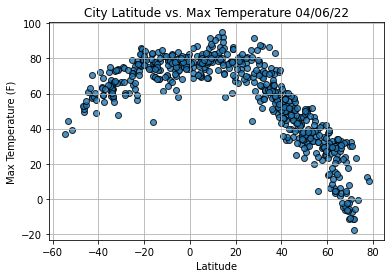

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

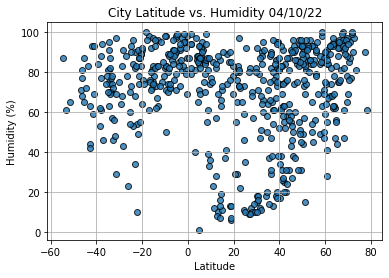

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

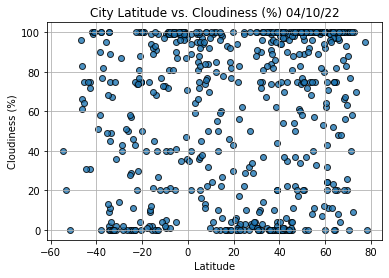

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

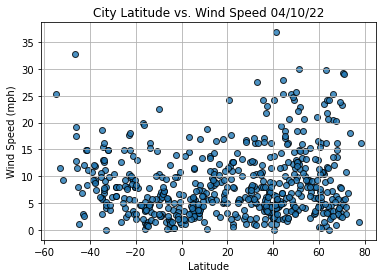

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2022-04-05 23:51:12,62.4560,-114.3525,31.41,74,100,10.36
1,Severomuysk,RU,2022-04-05 23:51:12,56.1481,113.4267,4.59,79,100,2.24
2,Puerto Colombia,CO,2022-04-05 23:51:13,10.9878,-74.9547,82.49,85,99,18.77
3,Mpraeso,GH,2022-04-05 23:51:13,6.5932,-0.7346,74.19,91,94,3.38
4,Hilo,US,2022-04-05 23:51:13,19.7297,-155.0900,76.73,78,100,8.05


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

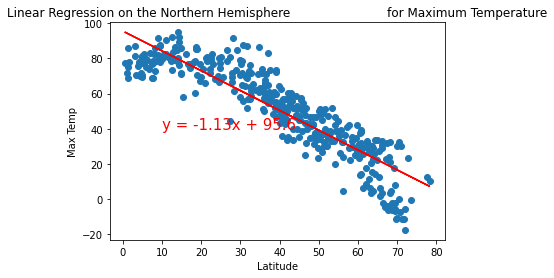

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

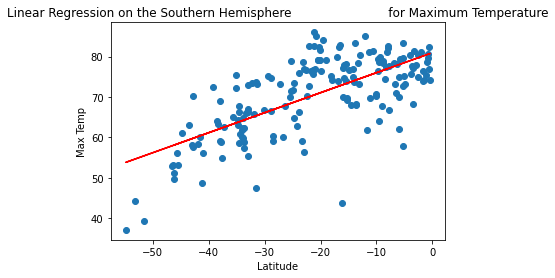

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

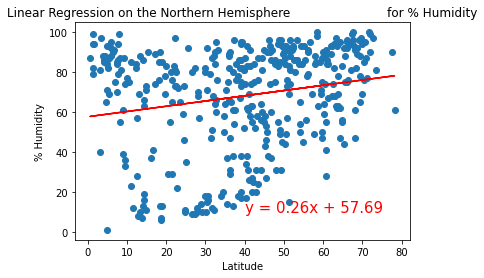

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

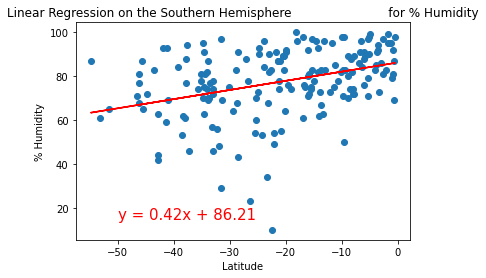

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

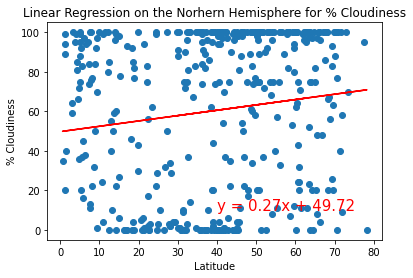

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Norhern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

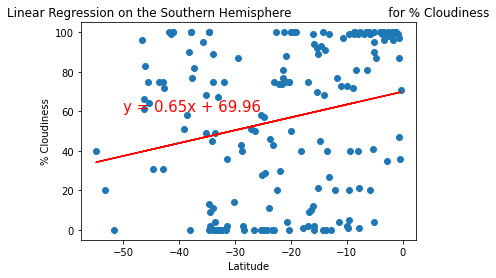

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

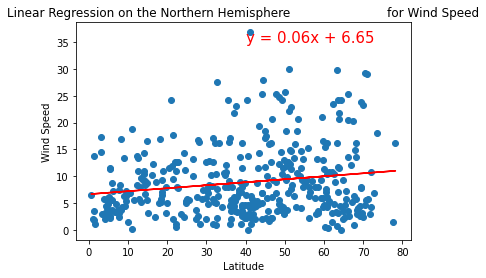

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

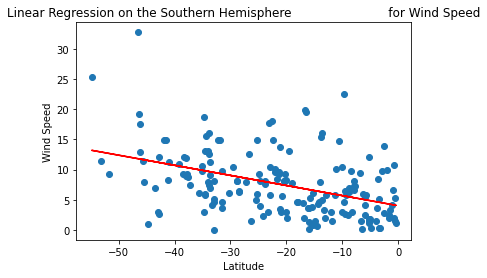

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))